In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Corrected URL to directly access the CSV data from the Google Sheet
url = 'https://docs.google.com/spreadsheets/d/1YVieJdJS8APAPEC8JFPxDTiqC-1NDeuYxTULqFHiuggFg/gviz/tq?tqx=out:csv&gid=0'
df = pd.read_csv('sustainable_waste_management_dataset_2024.csv', parse_dates=['date'])

df.head()

,date,day_name,area,population,waste_kg,recyclable_kg,organic_kg,collection_capacity_kg,overflow,is_weekend,is_holiday,recycling_campaign,temp_c,rain_mm
0,2024-01-01,Monday,Riverside,17990,20898.0,5047.7,8777.9,20893.4,1,0,1,0,24.1,0.7
1,2024-01-02,Tuesday,Riverside,17970,18001.1,4750.4,6814.8,21832.2,0,0,0,0,24.1,5.9
2,2024-01-03,Wednesday,Riverside,17965,18708.2,4347.0,6491.1,19770.4,0,0,0,0,24.3,18.1
3,2024-01-04,Thursday,Riverside,17960,18788.9,4869.5,10412.8,22552.6,0,0,0,0,24.6,11.7
4,2024-01-05,Friday,Riverside,17959,18982.9,3921.8,7888.5,21068.9,0,0,0,0,23.9,4.0


In [25]:
# เลือก feature แล้วทำการทำความสะอาดข้อมูล
selected_features = ['population', 'waste_kg', 'collection_capacity_kg', 'recycling_campaign']
X = df[selected_features]
y = df['recyclable_kg']
df_combined = pd.concat([X, y], axis=1)
df_combined.dropna(inplace=True)

X = df_combined[selected_features]
y = df_combined['recyclable_kg']

In [30]:
# แบ่ง dataframe เป็น 2 ส่วนหลัก ๆ โดยมีส่วนที่ใช้สำหรับฝึกโมเดลและทดสอบโมเดล
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.9, random_state=5)

model = LinearRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print("MSE: ", mean_squared_error(Y_test, Y_pred))
print("R squared: ", r2_score(Y_test, Y_pred))

MSE:  1551874.1411163877
R squared:  0.7500490151646614


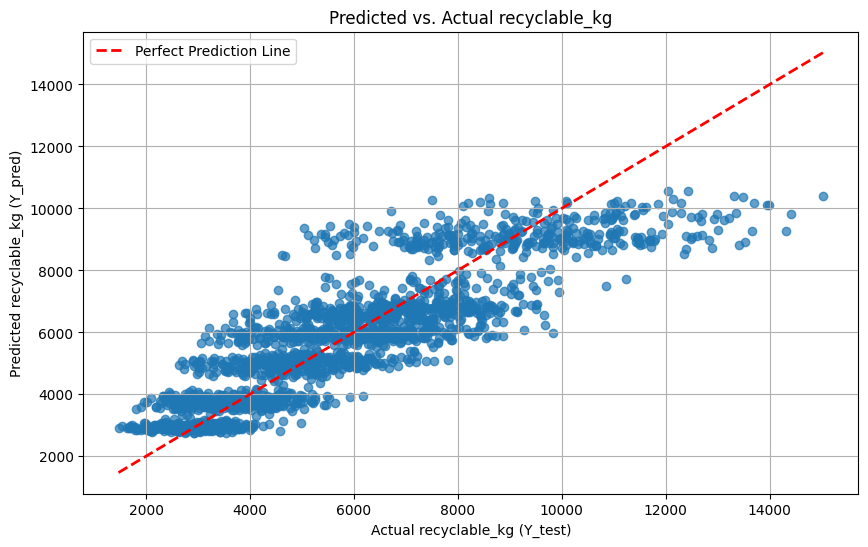

In [31]:
# พล็อตกราฟเปรียบเทียบ

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual recyclable_kg (Y_test)')
plt.ylabel('Predicted recyclable_kg (Y_pred)')
plt.title('Predicted vs. Actual recyclable_kg')
plt.legend()
plt.grid(True)
plt.show()

### การวิเคราะห์ความสัมพันธ์ของ Features กับ Target Variable

เราจะทำการคำนวณและแสดง Correlation Matrix เพื่อทำความเข้าใจว่าแต่ละคุณสมบัติมีความสัมพันธ์อย่างไรกับตัวแปรเป้าหมาย (`recyclable_kg`) และคุณสมบัติแต่ละตัวมีความสัมพันธ์กันเองอย่างไร

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# รวม features และ target เข้าด้วยกันเพื่อคำนวณ correlation
df_correlation = df_combined[selected_features + ['recyclable_kg']]

# คำนวณ Correlation Matrix
correlation_matrix = df_correlation.corr()

# แสดง Correlation Matrix ด้วย Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Recyclable Waste (kg)')
plt.show()

print("Correlation with recyclable_kg:")
print(correlation_matrix['recyclable_kg'].sort_values(ascending=False))

จากผลลัพธ์ของ Correlation Matrix และ Heatmap เราจะสามารถพิจารณาได้ดังนี้:

1.  **ความสัมพันธ์กับ `recyclable_kg`**: คุณสมบัติใดที่มีค่าสัมประสิทธิ์สหสัมพันธ์ (correlation coefficient) ที่มีค่าสัมบูรณ์สูง (ใกล้ 1 หรือ -1) จะมีความสัมพันธ์ที่แข็งแกร่งกับ `recyclable_kg` ซึ่งอาจเป็นคุณสมบัติที่ดีในการทำนาย
2.  **Multicollinearity (ความสัมพันธ์ระหว่างคุณสมบัติด้วยกัน)**: หากคุณสมบัติสองตัวหรือมากกว่ามีความสัมพันธ์กันเองสูงมาก (ค่าสัมบูรณ์ใกล้ 1) อาจทำให้เกิดปัญหา Multicollinearity ได้ ซึ่งอาจส่งผลกระทบต่อเสถียรภาพของโมเดล Linear Regression ในกรณีนี้ เราอาจเลือกเก็บเพียงคุณสมบัติเดียวในกลุ่มนั้น หรือใช้วิธีลดมิติข้อมูล (dimensionality reduction)

จากข้อมูลข้างต้น คุณควรพิจารณา:

*   **คุณสมบัติที่มีสหสัมพันธ์สูงกับ `recyclable_kg`**: เช่น `waste_kg` และ `population` ดูเหมือนจะมีสหสัมพันธ์เชิงบวกที่สูง
*   **คุณสมบัติที่มีสหสัมพันธ์ต่ำหรือไม่มีเลย**: เช่น `recycling_campaign` อาจมีสหสัมพันธ์ค่อนข้างต่ำ ซึ่งอาจบ่งชี้ว่ามันอาจจะไม่ใช่ตัวทำนายที่ดีนักสำหรับโมเดลเชิงเส้นตรง หรือต้องพิจารณาความสัมพันธ์ในรูปแบบอื่น (เช่น non-linear) หากต้องการใช้คุณสมบัตินี้

**ข้อเสนอแนะสำหรับการเลือก Feature**:
ลองทดลองสร้างโมเดลโดยใช้ชุดของคุณสมบัติที่แตกต่างกัน เช่น:
1.  **ใช้เฉพาะคุณสมบัติที่มีสหสัมพันธ์สูง**: อาจจะเริ่มจาก `population`, `waste_kg`, `collection_capacity_kg` ก่อน
2.  **พิจารณา `recycling_campaign`**: แม้จะมีความสัมพันธ์ต่ำ แต่ก็อาจมีผลกระทบที่ซับซ้อนหรือไม่ใช่เชิงเส้น ซึ่ง Linear Regression อาจจับไม่ได้ หากต้องการใช้ อาจต้องลองโมเดลที่ไม่ใช่เชิงเส้น (non-linear models) หรือตรวจสอบว่ามีผลกระทบในรูปแบบอื่นหรือไม่

คุณต้องการให้ผมลองสร้างโมเดลใหม่ด้วยชุดคุณสมบัติที่แตกต่างกันหรือไม่ครับ